In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [3]:
#Read in the csv file and convert to a Pandas dataframe
marathon_df = pd.read_csv("Data/Riyadh Marathon Results.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
marathon_df.head()

,Unnamed: 0,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,0,46 / 2285,1 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,1,53 / 2285,2 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM
2,2,55 / 2285,3 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM
3,3,88 / 2285,4 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,00:48:22.908,12.4 Km/Hr,4:50 min/km,10 KM
4,4,93 / 2285,5 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,00:48:27.714,12.3 Km/Hr,4:50 min/km,10 KM


**Note:**
- Your gun/clock time is the time on the official race clock from the moment the race started (when the gun went off) to when you crossed over the finish line.
- Your net/chip time is the time from when you personally cross the starting line to when you cross the finish.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [5]:
marathon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6397 non-null   int64 
 1   Rank         6397 non-null   object
 2   Gender Rank  6397 non-null   object
 3   Name         6397 non-null   object
 4   Gender       6397 non-null   object
 5   Category     6397 non-null   object
 6   Nationality  6085 non-null   object
 7   Gun Time     6397 non-null   object
 8   Chip Time    6227 non-null   object
 9   Speed        6227 non-null   object
 10  Pace         6227 non-null   object
 11  Distance     6397 non-null   object
dtypes: int64(1), object(11)
memory usage: 599.8+ KB


In [6]:
marathon_df.shape

(6397, 12)

In [7]:
marathon_df.columns 

Index(['Unnamed: 0', 'Rank', 'Gender Rank', 'Name', 'Gender', 'Category',
       'Nationality', 'Gun Time', 'Chip Time', 'Speed', 'Pace', 'Distance'],
      dtype='object')

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [8]:
''' 
the data was from kaggle and the original source was "my.raceresult.com", which was the official site at the time.
Hence the data is relaible.
'''

' \nthe data was from kaggle and the original source was "my.raceresult.com", which was the official site at the time.\nHence the data is relaible.\n'

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [9]:
#The data is not up to date, it's till 2022 but thats the latest we found at the time.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [10]:
# The data is consistent

In [11]:
marathon_df.head(2)

,Unnamed: 0,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,0,46 / 2285,1 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,1,53 / 2285,2 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [16]:
#checking for unique values
marathon_df["Name"].unique()

array(['6b848725-e44d-42d8-a278-ae67faa9cb80',
       '6e60b635-494b-4bbd-9a92-bb52ae2bf140',
       'ee2e687b-c339-4f3f-a481-2bee50f01521',
       'e084862c-4867-4cec-85d1-cc9d2e8acb60',
       '1bc14a33-5d72-4b18-a492-1d94d0eba76d',
       '3ce2e755-b5ea-409a-9174-31778c11fcf0',
       '7968347b-c3ac-417c-bccd-99854e8bf972',
       '110903c1-ce66-4b6c-b35f-bfc2ed3fdb23',
       'a4d8a45d-d0f0-4d00-8bc9-3d9d6e31f73d',
       'ee5b6325-c4f3-4122-8247-1818e59912c2',
       'cde359f8-5d73-4426-8ba6-cf021cfddbfc',
       '7aa1ce03-6d9c-4b53-93a9-d01b1bae7334'], dtype=object)

In [13]:
#checking difference between category and distance
marathon_df[["Category", "Distance"]].value_counts()

Category             Distance
10KM RUN             10 KM       2352
4KM FUN RUN          4 KM        2225
HALF MARATHON        21.1 KM     1152
MARATHON             42.2 KM      474
                     35 KM         53
4KM FUN RUN          0 KM          46
MARATHON ELITE       42.2 KM       18
10KM RUN             0 KM          16
MARATHON             20 KM          8
HALF MARATHON        10 KM          7
10KM RUN             5 KM           6
HALF MARATHON        20 KM          6
HALF MARATHON ELITE  21.1 KM        6
MARATHON             30 KM          5
HALF MARATHON        15 KM          4
MARATHON             0 KM           4
                     25 KM          3
HALF MARATHON        5 KM           2
MARATHON             40 KM          2
                     15 KM          2
                     10 KM          1
                     5 KM           1
MARATHON ELITE       0 KM           1
                     30 KM          1
                     35 KM          1
                    

In [17]:
#Delete unrelevent columns
marathon_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [18]:
marathon_df.drop(["Name"],axis=1,inplace=True)

In [19]:
marathon_df.head()

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,46 / 2285,1 / 761,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,53 / 2285,2 / 761,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM
2,55 / 2285,3 / 761,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM
3,88 / 2285,4 / 761,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,00:48:22.908,12.4 Km/Hr,4:50 min/km,10 KM
4,93 / 2285,5 / 761,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,00:48:27.714,12.3 Km/Hr,4:50 min/km,10 KM


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [20]:
#checking for duplicates
marathon_df.duplicated().sum() # -> 94 duplicated rows


94

In [21]:
marathon_df[marathon_df.duplicated()]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
767,-,-,Female,10KM RUN,[img:flags/SA.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,0 KM
768,-,-,Female,10KM RUN,[img:flags/SA.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,0 KM
769,-,-,Female,10KM RUN,[img:flags/SA.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,0 KM
2321,-,-,Male,10KM RUN,[img:flags/PK.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,5 KM
2322,-,-,Male,10KM RUN,[img:flags/SA.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,5 KM
...,...,...,...,...,...,...,...,...,...,...
6274,-,-,Male,MARATHON,[img:flags/SA.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,20 KM
6276,-,-,Male,MARATHON,[img:flags/SA.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,20 KM
6278,-,-,Male,MARATHON,[img:flags/SA.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,15 KM
6282,-,-,Male,MARATHON,NaN,[22526.31|hh:mm:ss],NaN,NaN,NaN,0 KM


In [22]:
marathon_df[marathon_df.duplicated()][["Rank","Gender Rank"]].value_counts()

Rank  Gender Rank
-     -              94
Name: count, dtype: int64

In [23]:
marathon_df = marathon_df.drop_duplicates()

In [24]:
marathon_df.shape

(6303, 10)

In [33]:
#Display number missing values per column
marathon_df.isnull().sum().sort_values(ascending = False)

Unnamed: 0     0
Rank           0
Gender Rank    0
Name           0
Gender         0
Category       0
Nationality    0
Gun Time       0
Chip Time      0
Speed          0
Pace           0
Distance       0
dtype: int64

In [ ]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [ ]:
marathon_df.head(2)

In [ ]:
# check columns types 
marathon_df.dtypes

In [ ]:
# go to clean them in cleaning

In [ ]:
# check outliers 
marathon_df.head(2)

In [44]:
marathon_df.head(2)

,Unnamed: 0,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_Total,Gender Rank_Total
0,0,46,1,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761
1,1,53,2,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761


In [57]:
# this is after cleaning data (cells bellow)
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = marathon_df['Speed_Km/Hr'].quantile(0.25)
speed_Q3 = marathon_df['Speed_Km/Hr'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# Filter out outliers
marathon_df[(marathon_df['Speed_Km/Hr'] < speed_lower_bound) | (marathon_df['Speed_Km/Hr'] > speed_upper_bound)].shape

(140, 12)

In [58]:
# Calculate (5th percentile) and (95th percentile)
speed_5 = marathon_df['Speed_Km/Hr'].quantile(0.05)
speed_95 = marathon_df['Speed_Km/Hr'].quantile(0.95)

# Filter out outliers
marathon_df[(marathon_df['Speed_Km/Hr'] < speed_5) | (marathon_df['Speed_Km/Hr'] > speed_95)].shape

(599, 12)

In [59]:
marathon_df.shape

(6227, 12)

In [60]:
# Calculate the z-score for each data point in the 'data' column
marathon_df['speed_z_score'] = zscore(marathon_df['Speed_Km/Hr'])

# Filter the DataFrame to remove outliers
marathon_df[(marathon_df['speed_z_score'] > 3) | (marathon_df['speed_z_score'] < -3)].shape

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\2933026683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['speed_z_score'] = zscore(marathon_df['Speed_Km/Hr'])


(92, 13)

In [61]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ILbJXAzcB3hU4LxAMG6yLw.jpeg)

-------------------



In [26]:
marathon_df.isnull().sum().sort_values(ascending = False)

Nationality    306
Chip Time       76
Speed           76
Pace            76
Rank             0
Gender Rank      0
Gender           0
Category         0
Gun Time         0
Distance         0
dtype: int64

In [27]:
# assume they did not attened since no time for chipping
marathon_df[marathon_df['Chip Time'].isnull()]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
761,-,-,Female,10KM RUN,[img:flags/SA.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,5 KM
762,-,-,Female,10KM RUN,[img:flags/SA.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,0 KM
763,-,-,Female,10KM RUN,[img:flags/LB.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,0 KM
764,-,-,Female,10KM RUN,[img:flags/CA.gif],[32384.739|hh:mm:ss],NaN,NaN,NaN,0 KM
765,-,-,Female,10KM RUN,NaN,[32384.739|hh:mm:ss],NaN,NaN,NaN,0 KM
...,...,...,...,...,...,...,...,...,...,...
6283,-,-,Male,MARATHON,[img:flags/SA.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,0 KM
6377,-,-,Female,MARATHON ELITE,[img:flags/ET.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,0 KM
6388,-,-,Male,MARATHON ELITE,[img:flags/KE.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,40 KM
6389,-,-,Male,MARATHON ELITE,[img:flags/KE.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,35 KM


In [28]:
# assume they did not attened since no time for chipping
marathon_df[marathon_df['Chip Time'].isnull()].isnull().sum()

Rank            0
Gender Rank     0
Gender          0
Category        0
Nationality     8
Gun Time        0
Chip Time      76
Speed          76
Pace           76
Distance        0
dtype: int64

In [29]:
marathon_df.dropna(subset=['Chip Time', 'Speed', 'Pace'], inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\2823928398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df.dropna(subset=['Chip Time', 'Speed', 'Pace'], inplace=True)


In [30]:
marathon_df.isnull().sum().sort_values(ascending = False)

Nationality    298
Rank             0
Gender Rank      0
Gender           0
Category         0
Gun Time         0
Chip Time        0
Speed            0
Pace             0
Distance         0
dtype: int64

In [31]:
marathon_df[marathon_df['Nationality'].isnull()]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
6,130 / 2285,7 / 761,Female,10KM RUN,NaN,00:51:21.156,00:51:09.616,11.7 Km/Hr,5:06 min/km,10 KM
27,360 / 2285,28 / 761,Female,10KM RUN,NaN,00:59:46.301,00:59:44.562,10.0 Km/Hr,5:58 min/km,10 KM
39,455 / 2285,40 / 761,Female,10KM RUN,NaN,01:04:04.435,01:02:13.336,9.6 Km/Hr,6:13 min/km,10 KM
51,530 / 2285,52 / 761,Female,10KM RUN,NaN,01:05:52.357,01:04:16.292,9.3 Km/Hr,6:25 min/km,10 KM
54,536 / 2285,55 / 761,Female,10KM RUN,NaN,01:04:46.663,01:04:21.924,9.3 Km/Hr,6:26 min/km,10 KM
...,...,...,...,...,...,...,...,...,...,...
6316,-,-,Male,MARATHON,NaN,03:32:04.083,02:49:43.336,14.9 Km/Hr,4:01 min/km,42.2 KM
6317,-,-,Male,MARATHON,NaN,03:32:04.708,02:49:44.087,14.9 Km/Hr,4:01 min/km,42.2 KM
6330,-,-,Male,MARATHON,NaN,03:31:09.051,03:17:46.863,12.8 Km/Hr,4:41 min/km,42.2 KM
6351,-,-,Male,MARATHON,NaN,03:56:48.878,03:42:10.789,11.3 Km/Hr,5:15 min/km,42.2 KM


In [32]:
#other column data is good, so we assume that this missing during collecting data (filling form)
marathon_df['Nationality'].fillna('Unknown!', inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\163565897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Nationality'].fillna('Unknown!', inplace=True)


In [33]:
marathon_df.isnull().sum().sort_values(ascending = False)

Rank           0
Gender Rank    0
Gender         0
Category       0
Nationality    0
Gun Time       0
Chip Time      0
Speed          0
Pace           0
Distance       0
dtype: int64

In [34]:
marathon_df[(marathon_df['Rank']=='-')]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
770,-,-,Female,10KM RUN,[img:flags/SA.gif],00:42:05.165,00:42:05.165,14.2 Km/Hr,4:12 min/km,10 KM
771,-,-,Female,10KM RUN,[img:flags/IN.gif],01:04:07.034,01:04:07.034,9.3 Km/Hr,6:24 min/km,10 KM
772,-,-,Female,10KM RUN,[img:flags/PT.gif],01:18:07.863,01:18:07.863,7.6 Km/Hr,7:48 min/km,10 KM
773,-,-,Female,10KM RUN,[img:flags/PH.gif],01:18:46.940,01:18:46.940,7.6 Km/Hr,7:52 min/km,10 KM
774,-,-,Female,10KM RUN,[img:flags/PH.gif],01:22:28.217,01:22:28.217,7.2 Km/Hr,8:14 min/km,10 KM
...,...,...,...,...,...,...,...,...,...,...
6364,-,-,Male,MARATHON,[img:flags/SA.gif],04:29:23.849,04:17:28.782,9.8 Km/Hr,6:06 min/km,42.2 KM
6365,-,-,Male,MARATHON,[img:flags/AF.gif],04:42:13.532,04:30:08.835,9.3 Km/Hr,6:24 min/km,42.2 KM
6366,-,-,Male,MARATHON,[img:flags/SA.gif],04:53:02.507,04:41:14.383,9.0 Km/Hr,6:39 min/km,42.2 KM
6367,-,-,Male,MARATHON,Unknown!,04:53:55.101,04:53:55.101,8.6 Km/Hr,6:57 min/km,42.2 KM


In [35]:
#since we arent sure what x/y we will delay the "-" till after cleaning
marathon_df['Rank'] = marathon_df['Rank'].map(lambda x : '0 / 0' if x == '-' else x )
marathon_df['Gender Rank'] = marathon_df['Gender Rank'].map(lambda x : '0 / 0' if x == '-' else x )

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\1002136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Rank'] = marathon_df['Rank'].map(lambda x : '0 / 0' if x == '-' else x )
C:\Users\USER\AppData\Local\Temp\ipykernel_24892\1002136.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Gender Rank'] = marathon_df['Gender Rank'].map(lambda x : '0 / 0' if x == '-' else x )


In [36]:
marathon_df[(marathon_df['Rank']=='-')]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance


In [37]:
marathon_df[(marathon_df['Rank']=='0 / 0')]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
770,0 / 0,0 / 0,Female,10KM RUN,[img:flags/SA.gif],00:42:05.165,00:42:05.165,14.2 Km/Hr,4:12 min/km,10 KM
771,0 / 0,0 / 0,Female,10KM RUN,[img:flags/IN.gif],01:04:07.034,01:04:07.034,9.3 Km/Hr,6:24 min/km,10 KM
772,0 / 0,0 / 0,Female,10KM RUN,[img:flags/PT.gif],01:18:07.863,01:18:07.863,7.6 Km/Hr,7:48 min/km,10 KM
773,0 / 0,0 / 0,Female,10KM RUN,[img:flags/PH.gif],01:18:46.940,01:18:46.940,7.6 Km/Hr,7:52 min/km,10 KM
774,0 / 0,0 / 0,Female,10KM RUN,[img:flags/PH.gif],01:22:28.217,01:22:28.217,7.2 Km/Hr,8:14 min/km,10 KM
...,...,...,...,...,...,...,...,...,...,...
6364,0 / 0,0 / 0,Male,MARATHON,[img:flags/SA.gif],04:29:23.849,04:17:28.782,9.8 Km/Hr,6:06 min/km,42.2 KM
6365,0 / 0,0 / 0,Male,MARATHON,[img:flags/AF.gif],04:42:13.532,04:30:08.835,9.3 Km/Hr,6:24 min/km,42.2 KM
6366,0 / 0,0 / 0,Male,MARATHON,[img:flags/SA.gif],04:53:02.507,04:41:14.383,9.0 Km/Hr,6:39 min/km,42.2 KM
6367,0 / 0,0 / 0,Male,MARATHON,Unknown!,04:53:55.101,04:53:55.101,8.6 Km/Hr,6:57 min/km,42.2 KM


In [38]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [39]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,46 / 2285,1 / 761,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,53 / 2285,2 / 761,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM


In [40]:
marathon_df.dtypes

Rank           object
Gender Rank    object
Gender         object
Category       object
Nationality    object
Gun Time       object
Chip Time      object
Speed          object
Pace           object
Distance       object
dtype: object

In [41]:
#we need to save the total since it may be useful later
marathon_df['Rank_Total'] = marathon_df['Rank'].map(lambda x: int(x.split('/')[1]))
marathon_df['Rank'] = marathon_df['Rank'].map(lambda x: int(x.split('/')[0]))

marathon_df['Gender Rank_Total'] = marathon_df['Gender Rank'].map(lambda x: int(x.split('/')[1]))
marathon_df['Gender Rank'] = marathon_df['Gender Rank'].map(lambda x: int(x.split('/')[0]))

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\1299238563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Rank_Total'] = marathon_df['Rank'].map(lambda x: int(x.split('/')[1]))
C:\Users\USER\AppData\Local\Temp\ipykernel_24892\1299238563.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Rank'] = marathon_df['Rank'].map(lambda x: int(x.split('/')[0]))
C:\Users\USER\AppData\Local\Temp\ipykernel_24892\1299238563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [42]:
marathon_df.head(3)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance,Rank_Total,Gender Rank_Total
0,46,1,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM,2285,761
2,55,3,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM,2285,761


In [43]:
marathon_df.dtypes

Rank                  int64
Gender Rank           int64
Gender               object
Category             object
Nationality          object
Gun Time             object
Chip Time            object
Speed                object
Pace                 object
Distance             object
Rank_Total            int64
Gender Rank_Total     int64
dtype: object

In [44]:
marathon_df['Nationality'] = marathon_df['Nationality'].map(lambda x: x if x == 'Unknown!' else x.split('/')[1].split('.')[0])

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\804489147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Nationality'] = marathon_df['Nationality'].map(lambda x: x if x == 'Unknown!' else x.split('/')[1].split('.')[0])


In [45]:
marathon_df.dtypes

Rank                  int64
Gender Rank           int64
Gender               object
Category             object
Nationality          object
Gun Time             object
Chip Time            object
Speed                object
Pace                 object
Distance             object
Rank_Total            int64
Gender Rank_Total     int64
dtype: object

In [ ]:
# you could use regular experssion 
# https://regex-generator.olafneumann.org/

In [46]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance,Rank_Total,Gender Rank_Total
0,46,1,Female,10KM RUN,SA,00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM,2285,761


In [ ]:
#marathon_df['Chip Time'] = pd.to_datetime(marathon_df['Chip Time'], format='%H:%M:%S.%f')
#marathon_df['Chip Time'] = marathon_df['Chip Time'].dt.floor('s')

#marathon_df['Gun Time'] = pd.to_datetime(marathon_df['Gun Time'], format='%H:%M:%S.%f')
#marathon_df['Gun Time'] = marathon_df['Gun Time'].dt.floor('s')


In [47]:
marathon_df['Chip Time'] = pd.to_timedelta(marathon_df['Chip Time'])
marathon_df['Gun Time'] = pd.to_timedelta(marathon_df['Gun Time'])

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\2926747570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Chip Time'] = pd.to_timedelta(marathon_df['Chip Time'])
C:\Users\USER\AppData\Local\Temp\ipykernel_24892\2926747570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Gun Time'] = pd.to_timedelta(marathon_df['Gun Time'])


In [48]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance,Rank_Total,Gender Rank_Total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9 Km/Hr,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8 Km/Hr,4:20 min/km,10 KM,2285,761


In [49]:
marathon_df.dtypes

Rank                           int64
Gender Rank                    int64
Gender                        object
Category                      object
Nationality                   object
Gun Time             timedelta64[ns]
Chip Time            timedelta64[ns]
Speed                         object
Pace                          object
Distance                      object
Rank_Total                     int64
Gender Rank_Total              int64
dtype: object

In [50]:
marathon_df['Speed'] = marathon_df['Speed'].map(lambda x: float(x.split(' ')[0]))
# to not forget information about speed
marathon_df.rename(columns={'Speed': 'Speed_Km/Hr'}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\746727315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Speed'] = marathon_df['Speed'].map(lambda x: float(x.split(' ')[0]))
C:\Users\USER\AppData\Local\Temp\ipykernel_24892\746727315.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df.rename(columns={'Speed': 'Speed_Km/Hr'}, inplace=True)


In [51]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace,Distance,Rank_Total,Gender Rank_Total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4:20 min/km,10 KM,2285,761


In [52]:
#to check there is no other data types (all 6227 are min/km)
marathon_df['Pace'].map(lambda x: x.split()[1]).value_counts()

Pace
min/km    6227
Name: count, dtype: int64

In [53]:
def convert_pace(str_pace):
    time = str_pace.split(':')
    new_time = int(time[0]) + int(time[1])/60
    return round(new_time, 2)

In [54]:
marathon_df['Pace'] = marathon_df['Pace'].map(lambda x: x.split(' ')[0])
marathon_df['Pace'] = marathon_df['Pace'].map(convert_pace)
# to not forget information about speed
marathon_df.rename(columns={'Pace': 'Pace_min_Km'}, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_24892\2872594393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Pace'] = marathon_df['Pace'].map(lambda x: x.split(' ')[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_24892\2872594393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_df['Pace'] = marathon_df['Pace'].map(convert_pace)
C:\Users\USER\AppData\Local\Temp\ipykernel_24892\2872594393.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

In [55]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_Total,Gender Rank_Total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761


In [56]:
marathon_df.dtypes

Rank                           int64
Gender Rank                    int64
Gender                        object
Category                      object
Nationality                   object
Gun Time             timedelta64[ns]
Chip Time            timedelta64[ns]
Speed_Km/Hr                  float64
Pace_min_Km                  float64
Distance                      object
Rank_Total                     int64
Gender Rank_Total              int64
dtype: object

In [ ]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

In [62]:
marathon_df = marathon_df[(marathon_df['speed_z_score'] <= 3) & (marathon_df['speed_z_score'] >= -3)]

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [63]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_Total,Gender Rank_Total,speed_z_score
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,2.224072
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,2.187555


In [64]:
marathon_df.dtypes

Rank                           int64
Gender Rank                    int64
Gender                        object
Category                      object
Nationality                   object
Gun Time             timedelta64[ns]
Chip Time            timedelta64[ns]
Speed_Km/Hr                  float64
Pace_min_Km                  float64
Distance                      object
Rank_Total                     int64
Gender Rank_Total              int64
speed_z_score                float64
dtype: object

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [65]:
gender_count = marathon_df['Gender'].value_counts()
gender_count

Gender
Male      4019
Female    2116
Name: count, dtype: int64

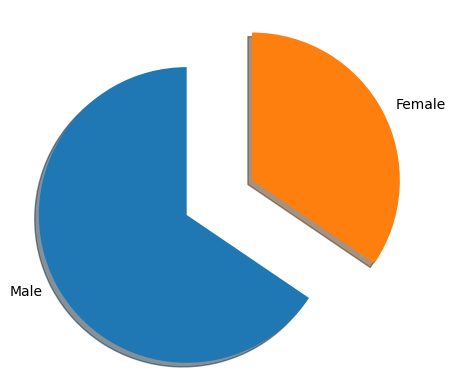

In [66]:
plt.pie(x=gender_count.values,
        labels=gender_count.index,
        startangle=90,

        shadow=True,
        explode = [0.3,0.2])
plt.show()

In [67]:
distance_counts = marathon_df["Distance"].value_counts()
distance_counts

Distance
10 KM      2333
4 KM       2209
21.1 KM    1148
42.2 KM     445
Name: count, dtype: int64

In [68]:
category_counts = marathon_df["Category"].value_counts()
category_counts

Category
10KM RUN          2333
4KM FUN RUN       2209
HALF MARATHON     1148
MARATHON           444
MARATHON ELITE       1
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

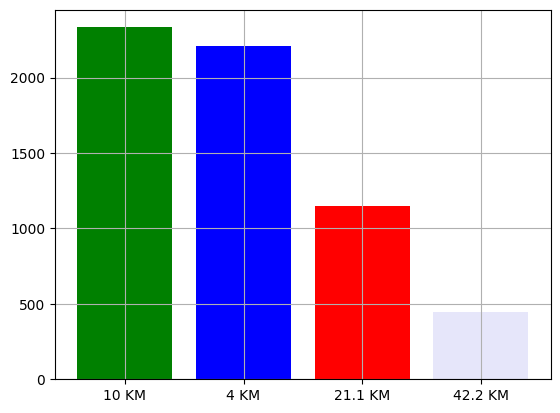

In [69]:
plt.bar(distance_counts.index, distance_counts.values, color=['green', 'blue', 'red', 'lavender'])
plt.grid()
plt.show

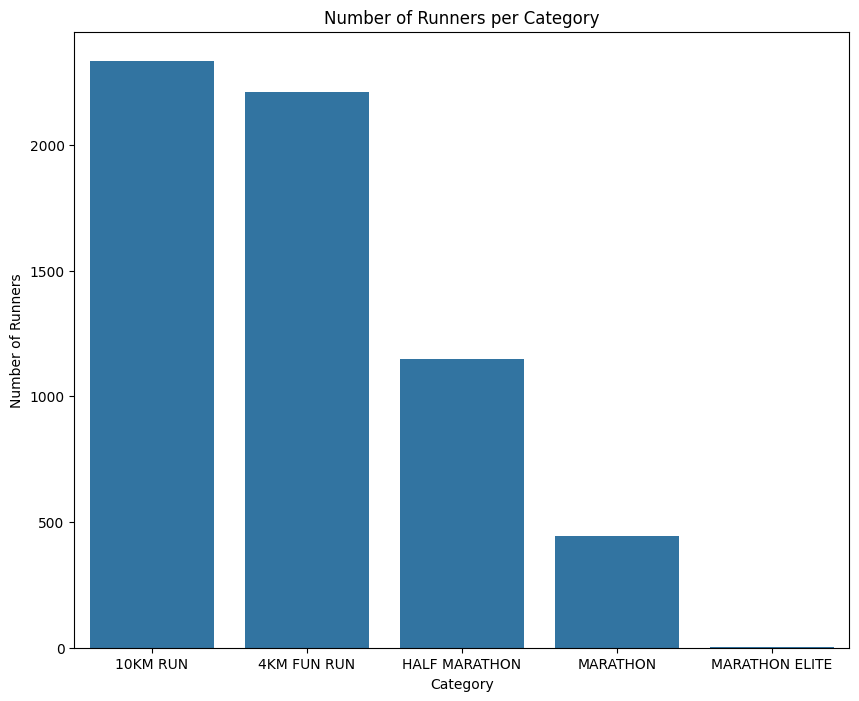

In [70]:
plt.figure(figsize=(10,8))
sns.countplot(data=marathon_df,x="Category")
plt.title("Number of Runners per Category")
plt.ylabel("Number of Runners")
plt.show()

In [74]:
top_nat_counts = marathon_df["Nationality"].value_counts().head(10)
top_nat_counts

Nationality
SA          3311
PH           452
Unknown!     296
IN           239
GB           209
EG           204
PK           154
JO           121
LB           120
MY            80
Name: count, dtype: int64

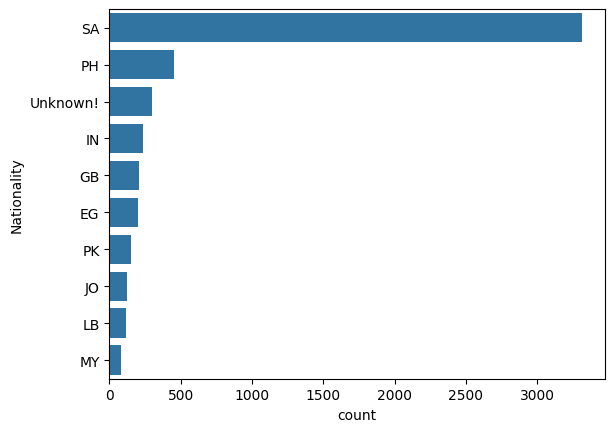

In [75]:
sns.barplot(y="Nationality", x="count",data=top_nat_counts.to_frame());

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [ ]:
marathon_df.head(2)

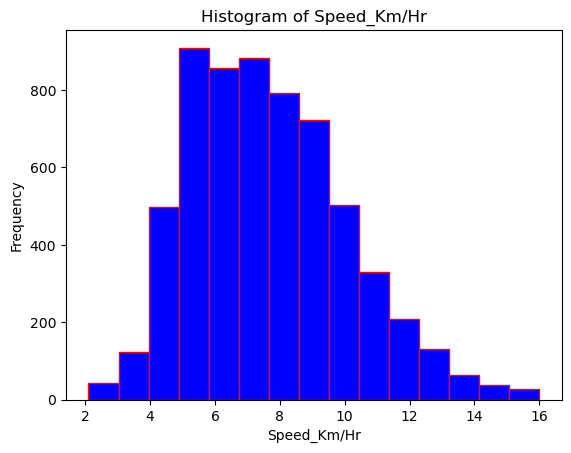

In [62]:
plt.hist(marathon_df['Speed_Km/Hr'],facecolor = 'b', edgecolor = 'red', bins = 15) # bins = 6 means 6 bars
plt.xlabel('Speed_Km/Hr')
plt.ylabel('Frequency')
plt.title(f'Histogram of Speed_Km/Hr')
plt.show()

In [88]:
## Note: The insights would be taking for each race individually 
marathon_4KM_df = marathon_df[marathon_df["Category"]=='4KM FUN RUN']
marathon_10KM_df = marathon_df[marathon_df["Category"]=='10KM RUN']
marathon_21KM_df = marathon_df[marathon_df["Category"]=='HALF MARATHON']
marathon_21KM_e_df = marathon_df[marathon_df["Category"]=='HALF MARATHON ELITE']
marathon_42KM_df = marathon_df[marathon_df["Category"]=='MARATHON']
marathon_42KM_e_df = marathon_df[marathon_df["Category"]=='MARATHON ELITE']

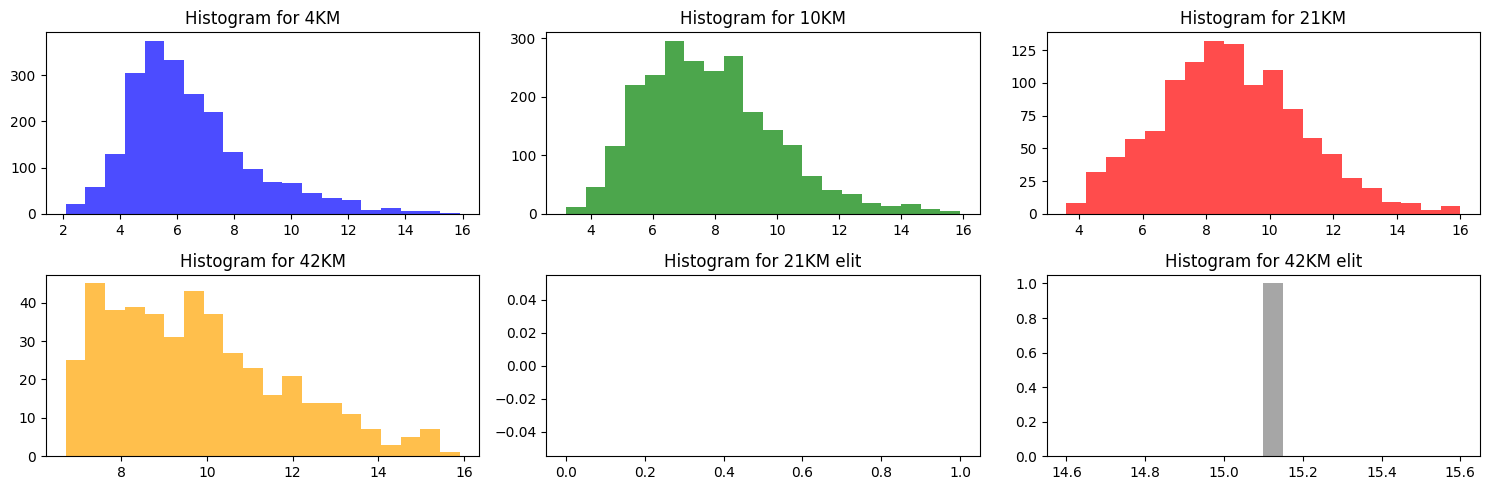

In [89]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
axes[0][0].hist(marathon_4KM_df['Speed_Km/Hr'], bins=20, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for 4KM')

axes[0][1].hist(marathon_10KM_df['Speed_Km/Hr'], bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram for 10KM')

axes[0][2].hist(marathon_21KM_df['Speed_Km/Hr'], bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Histogram for 21KM')

axes[1][0].hist(marathon_42KM_df['Speed_Km/Hr'], bins=20, alpha=0.7, color='orange')
axes[1][0].set_title('Histogram for 42KM')

axes[1][1].hist(marathon_21KM_e_df['Speed_Km/Hr'], bins=20, alpha=0.7, color='grey')
axes[1][1].set_title('Histogram for 21KM elit')

axes[1][2].hist(marathon_42KM_e_df['Speed_Km/Hr'], bins=20, alpha=0.7, color='grey')
axes[1][2].set_title('Histogram for 42KM elit')

# Display the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='Speed_Km/Hr', ylabel='Count'>

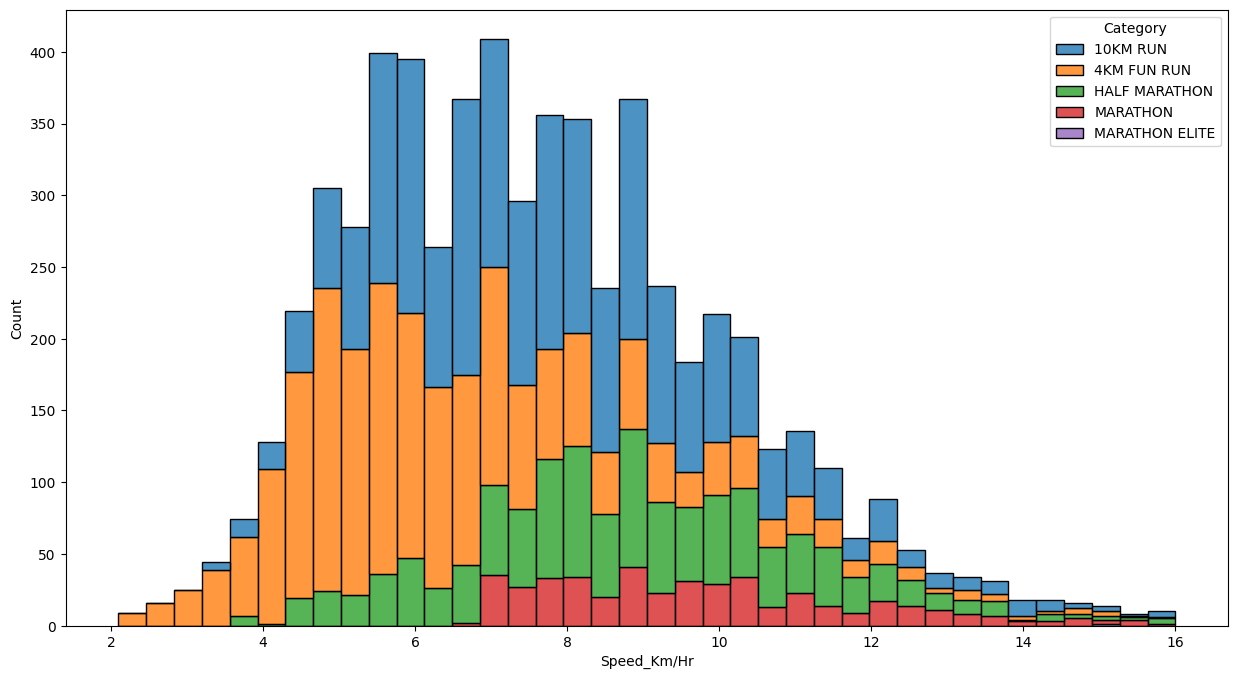

In [90]:
# Stacked Histogram separated by origin
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x="Speed_Km/Hr",
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

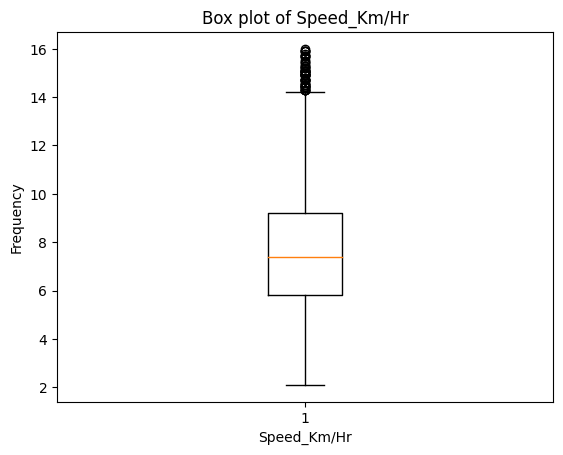

In [91]:
plt.boxplot(marathon_df['Speed_Km/Hr'])
plt.xlabel('Speed_Km/Hr')
plt.ylabel('Frequency')
plt.title(f'Box plot of Speed_Km/Hr')
plt.show()

<Axes: ylabel='Speed_Km/Hr'>

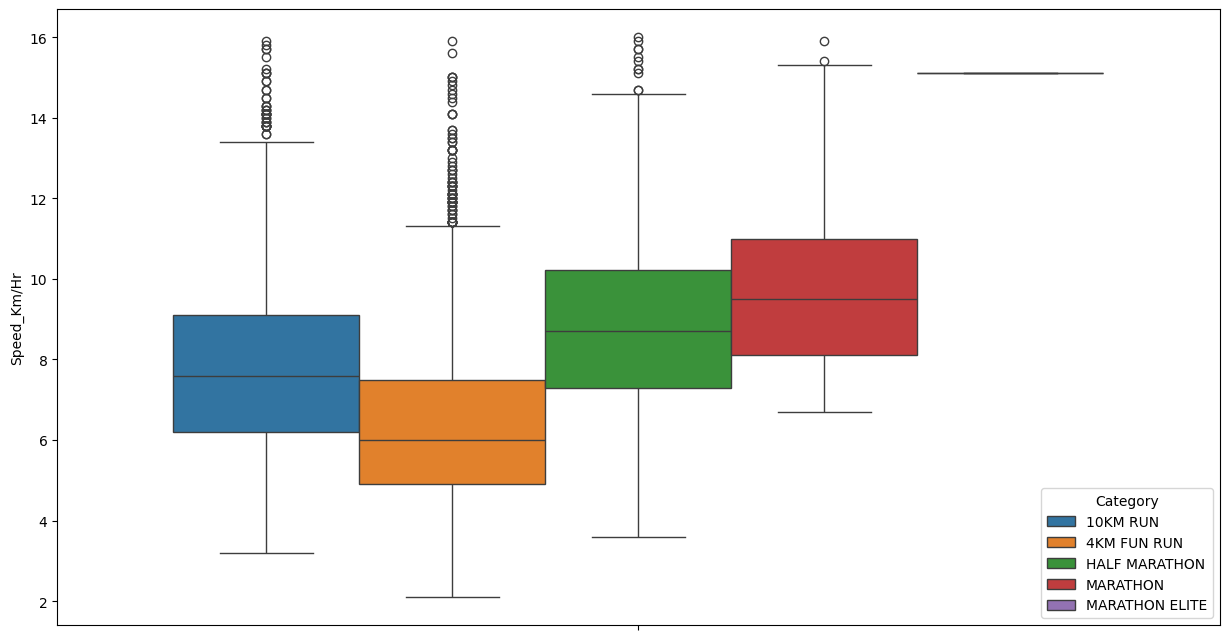

In [92]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y="Speed_Km/Hr",
    hue="Category")

<Axes: xlabel='Pace_min_Km', ylabel='Count'>

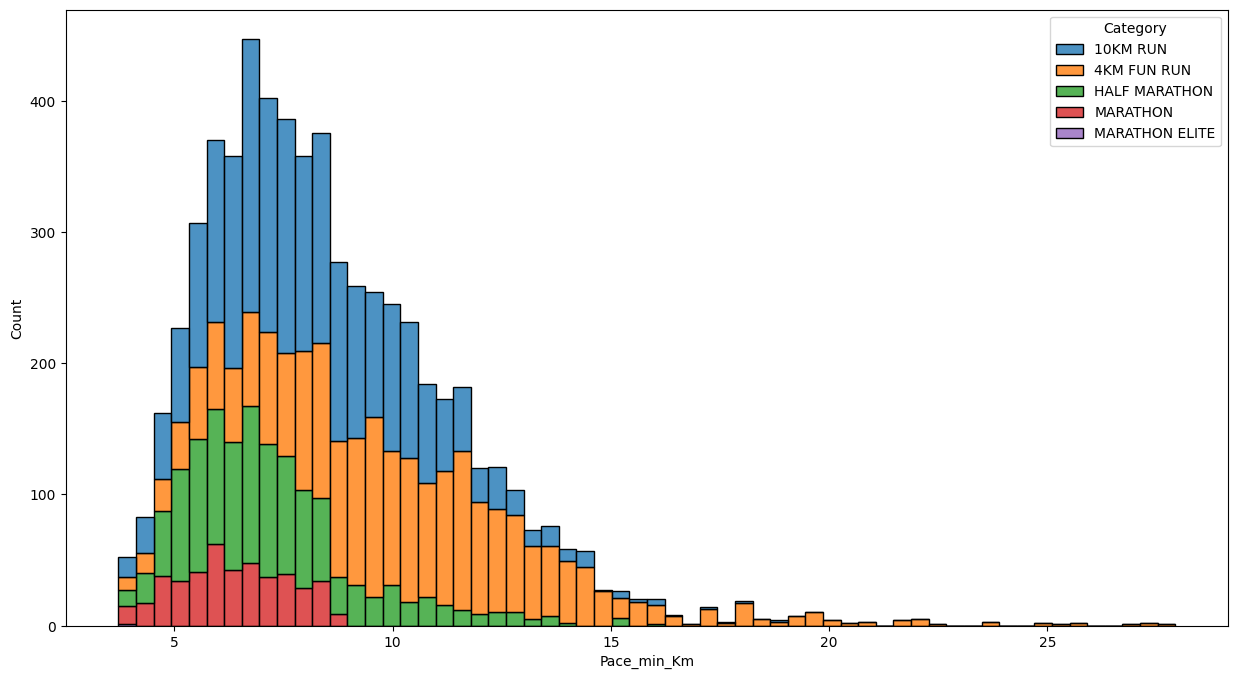

In [93]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x="Pace_min_Km",
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

<Axes: ylabel='Pace_min_Km'>

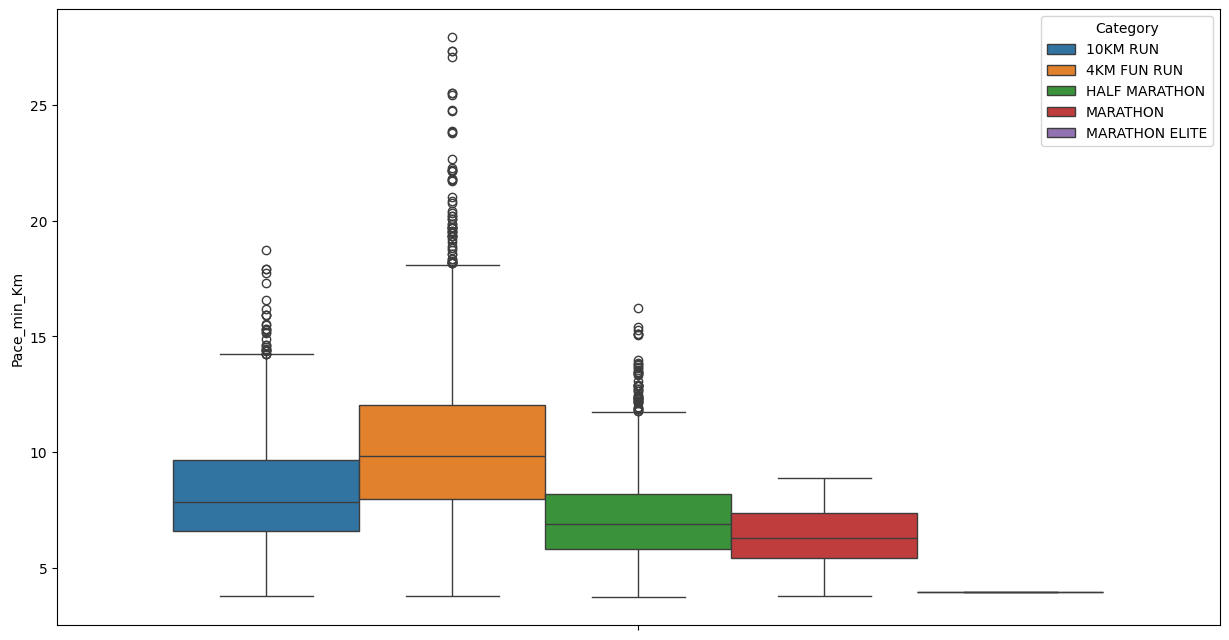

In [94]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y="Pace_min_Km",
    hue="Category")

In [95]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_Total,Gender Rank_Total,speed_z_score
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,2.224072
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,2.187555


In [96]:
# called feature engineering
marathon_df['Chip Time duration-min'] = marathon_df['Chip Time'].dt.total_seconds()/60
marathon_df['Chip Time duration-min'] = marathon_df['Chip Time duration-min'].apply(lambda x: np.round(x, 2))
marathon_df['Gun Time duration-min'] = marathon_df['Gun Time'].dt.total_seconds()/60
marathon_df['Gun Time duration-min'] = marathon_df['Gun Time duration-min'].apply(lambda x: np.round(x, 2))

<Axes: xlabel='Chip Time duration-min', ylabel='Count'>

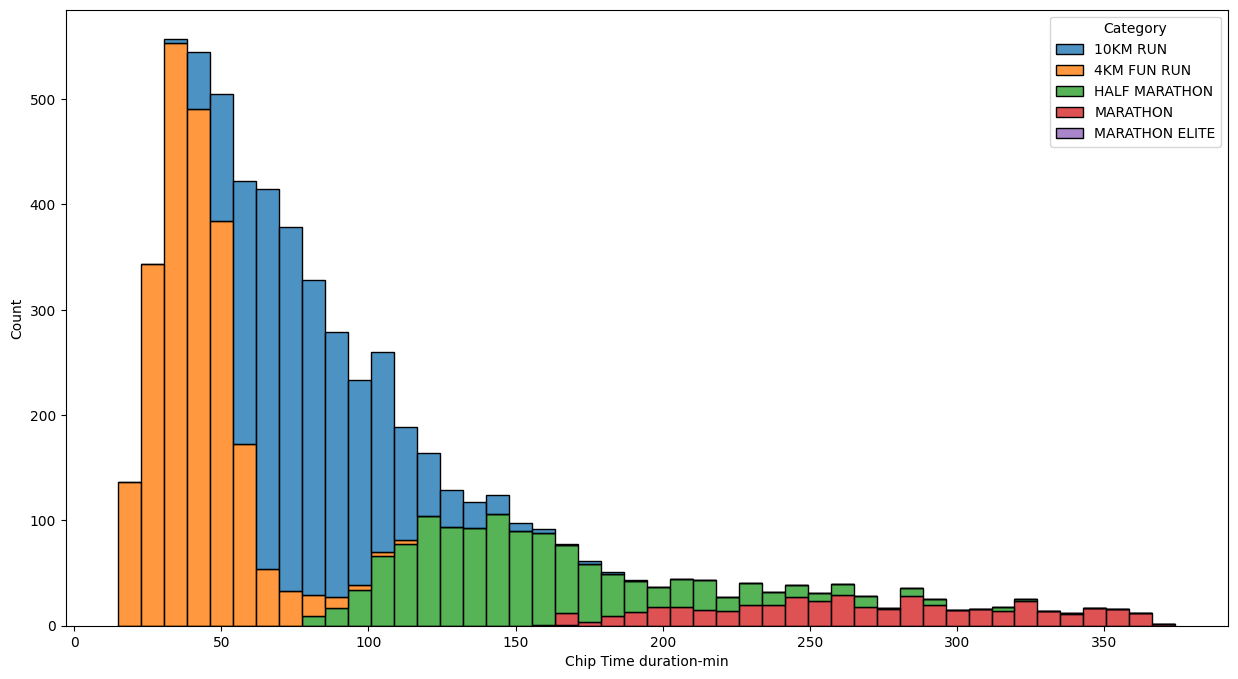

In [97]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x='Chip Time duration-min',
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

<Axes: xlabel='Gun Time duration-min', ylabel='Count'>

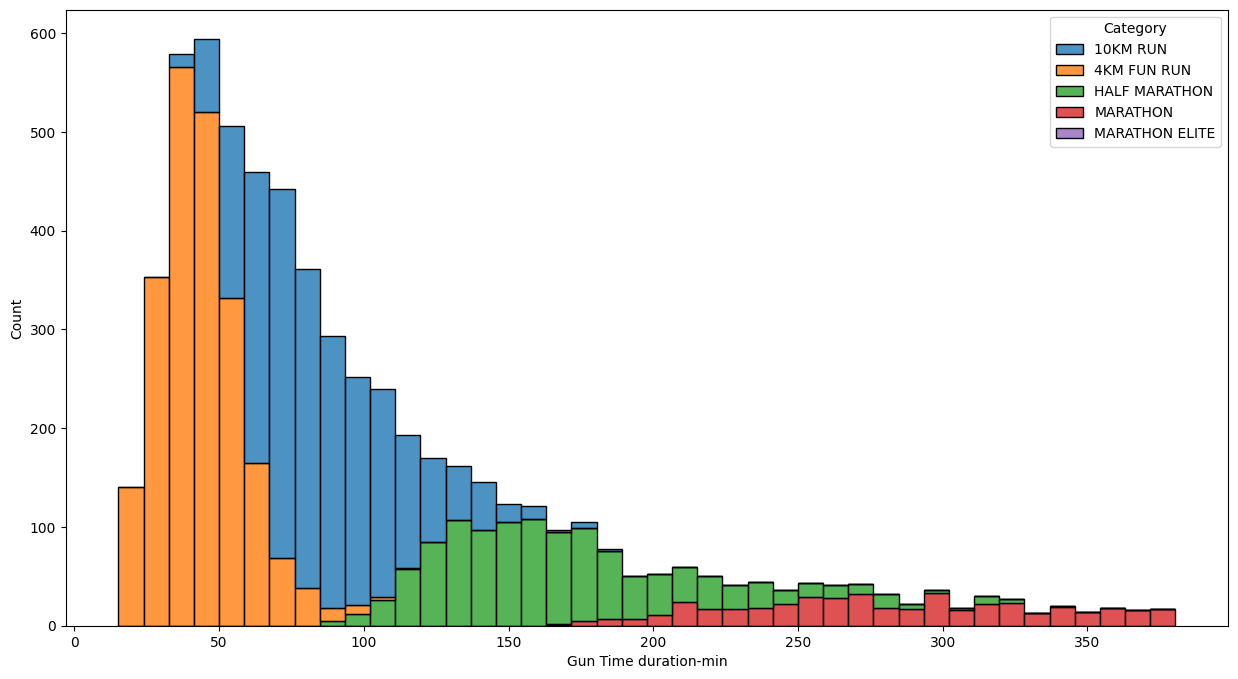

In [98]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x='Gun Time duration-min',
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [99]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_Total,Gender Rank_Total,speed_z_score,Chip Time duration-min,Gun Time duration-min
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,2.224072,42.96,42.99
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,2.187555,43.41,43.47


<Axes: ylabel='Chip Time duration-min'>

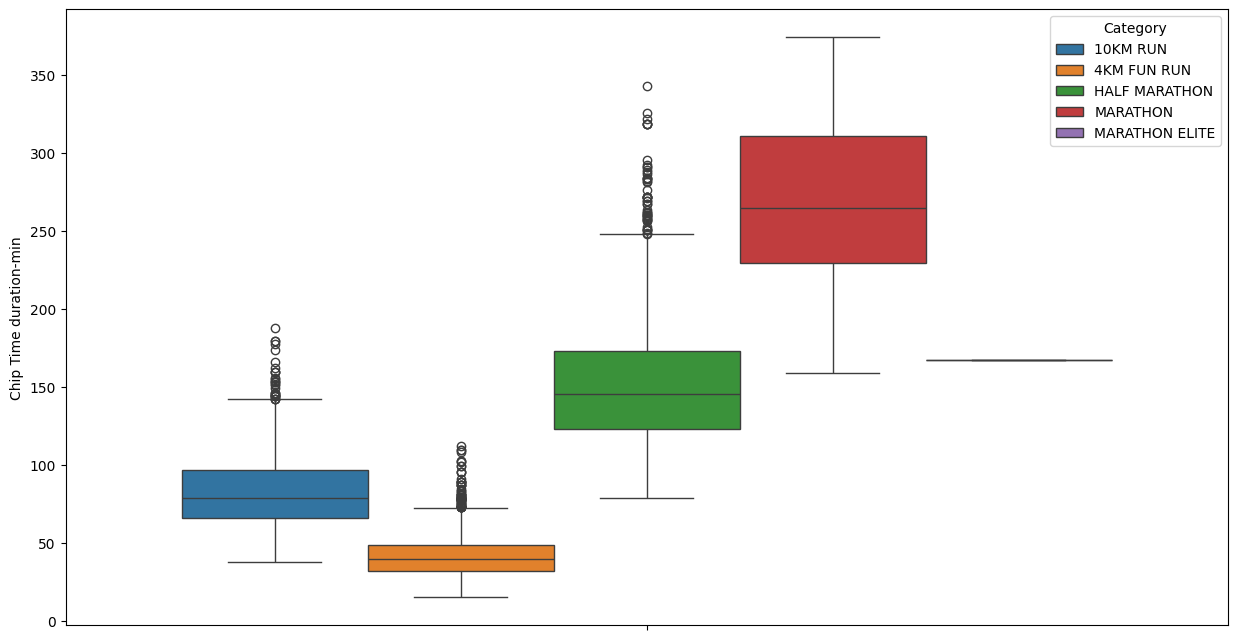

In [100]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y='Chip Time duration-min',
    hue="Category")

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [101]:
marathon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,6135.0,942.677914,660.19217,0.0,352.0,856.0,1486.0,2285.0
Gender Rank,6135.0,518.591198,376.163557,0.0,194.5,470.0,780.0,1524.0
Gun Time,6135,0 days 01:40:34.758369519,0 days 01:13:23.554202956,0 days 00:15:13.283000,0 days 00:48:16.931500,0 days 01:15:53.190000,0 days 02:09:16.604500,0 days 06:20:21.380000
Chip Time,6135,0 days 01:34:07.557121108,0 days 01:08:58.885480841,0 days 00:15:04.185000,0 days 00:45:46.439000,0 days 01:12:37.611000,0 days 01:57:12.803000,0 days 06:14:05.366000
Speed_Km/Hr,6135.0,7.65022,2.405912,2.1,5.8,7.4,9.2,16.0
Pace_min_Km,6135.0,8.616768,2.926587,3.72,6.52,8.05,10.25,27.93
Rank_Total,6135.0,1872.455094,662.303992,0.0,1128.0,2220.0,2285.0,2285.0
Gender Rank_Total,6135.0,1028.810758,401.755033,0.0,908.0,1038.0,1182.0,1524.0
speed_z_score,6135.0,-0.058191,0.878579,-2.084993,-0.733845,-0.149565,0.50775,2.99094
Chip Time duration-min,6135.0,94.125946,68.981375,15.07,45.775,72.63,117.215,374.09


In [102]:
# describe(include=’all’) provides a statistics summary of all data, include object, category etc
marathon_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rank,6135.0,NaN,NaN,NaN,942.677914,660.19217,0.0,352.0,856.0,1486.0,2285.0
Gender Rank,6135.0,NaN,NaN,NaN,518.591198,376.163557,0.0,194.5,470.0,780.0,1524.0
Gender,6135,2,Male,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,6135,5,10KM RUN,2333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nationality,6135,86,SA,3311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gun Time,6135,NaN,NaN,NaN,0 days 01:40:34.758369519,0 days 01:13:23.554202956,0 days 00:15:13.283000,0 days 00:48:16.931500,0 days 01:15:53.190000,0 days 02:09:16.604500,0 days 06:20:21.380000
Chip Time,6135,NaN,NaN,NaN,0 days 01:34:07.557121108,0 days 01:08:58.885480841,0 days 00:15:04.185000,0 days 00:45:46.439000,0 days 01:12:37.611000,0 days 01:57:12.803000,0 days 06:14:05.366000
Speed_Km/Hr,6135.0,NaN,NaN,NaN,7.65022,2.405912,2.1,5.8,7.4,9.2,16.0
Pace_min_Km,6135.0,NaN,NaN,NaN,8.616768,2.926587,3.72,6.52,8.05,10.25,27.93
Distance,6135,4,10 KM,2333,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
marathon_df['Pace_min_Km'].mean(), marathon_df['Pace_min_Km'].std()

(8.616767726161369, 2.9265869291377786)

In [104]:
np.quantile(marathon_df['Pace_min_Km'],0.25)

6.52

In [105]:
marathon_df['Pace_min_Km'].quantile(0.25)

6.52

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

<Axes: xlabel='Category', ylabel='Count'>

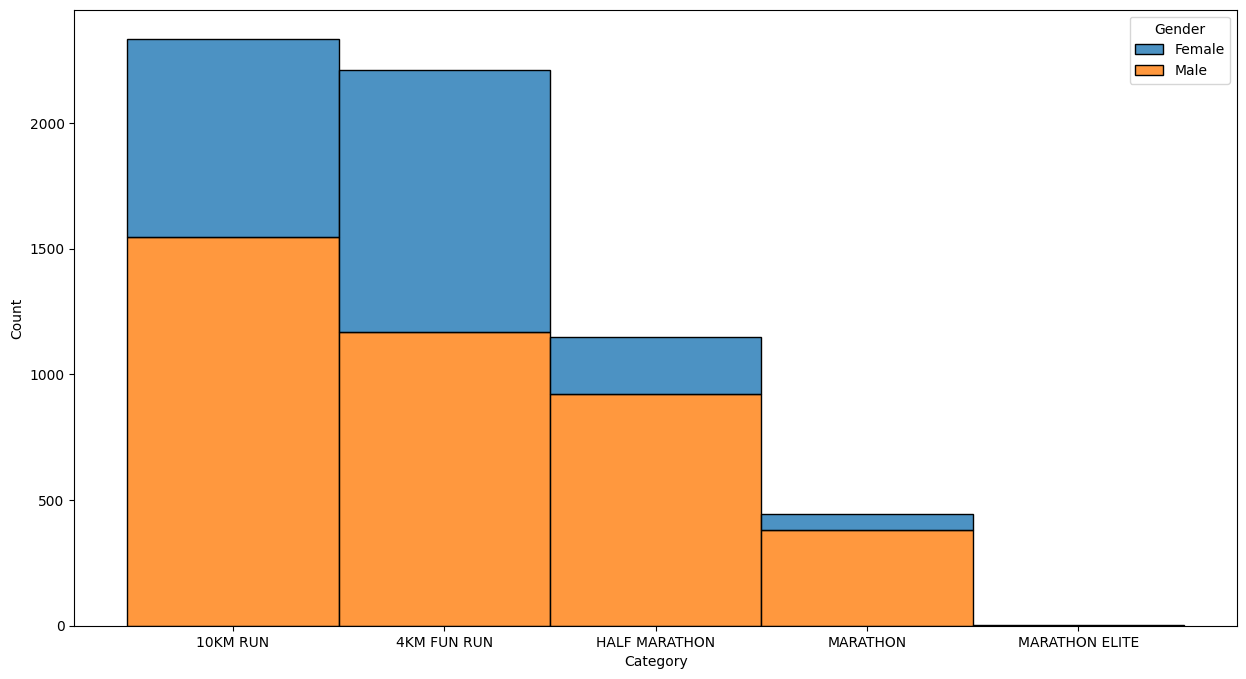

In [106]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x="Category",
    hue="Gender", # color of plot elementsoverall_Happiness_
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

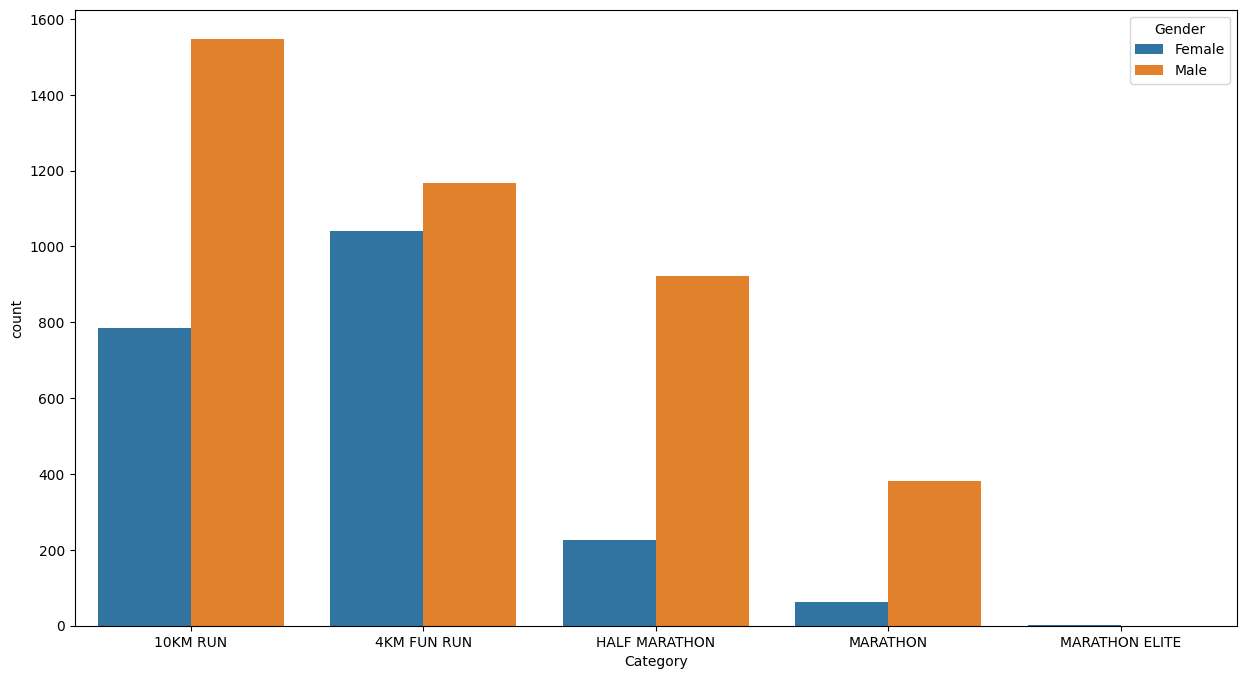

In [107]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Category', hue = 'Gender', data = marathon_df);

**Categorical & numerical --> (scatter plot, histogram, box plot)**

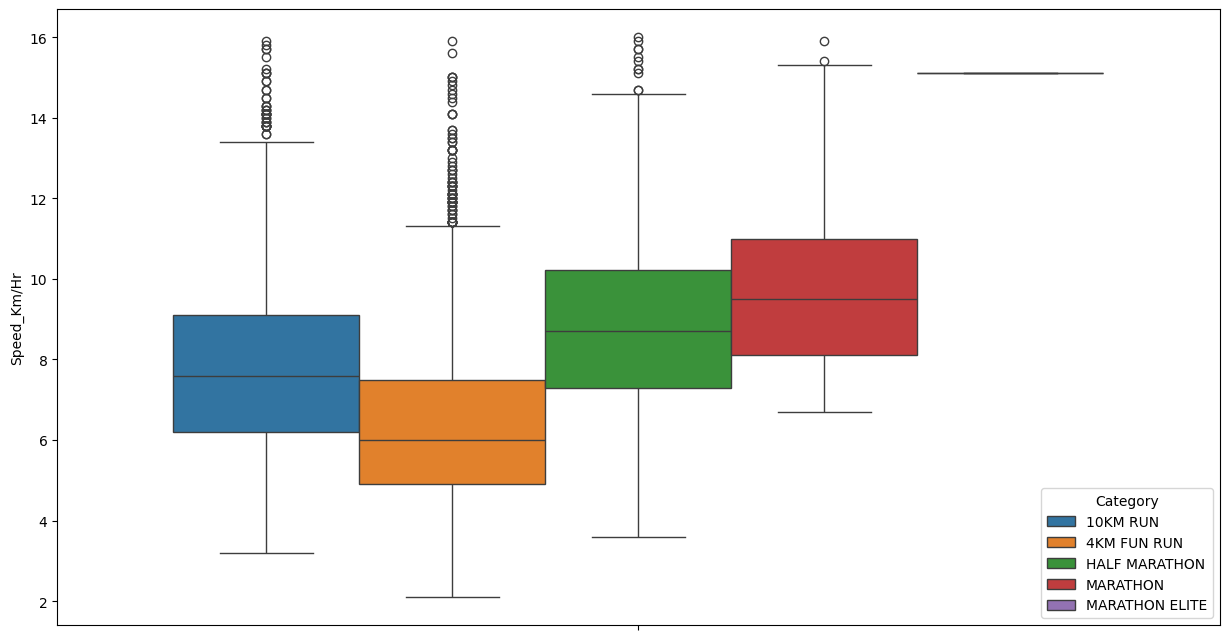

In [108]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y="Speed_Km/Hr",
    hue="Category");

**numerical & numerical --> (Scatter plot, line chart)**

In [109]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_Total,Gender Rank_Total,speed_z_score,Chip Time duration-min,Gun Time duration-min
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,2.224072,42.96,42.99
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,2.187555,43.41,43.47


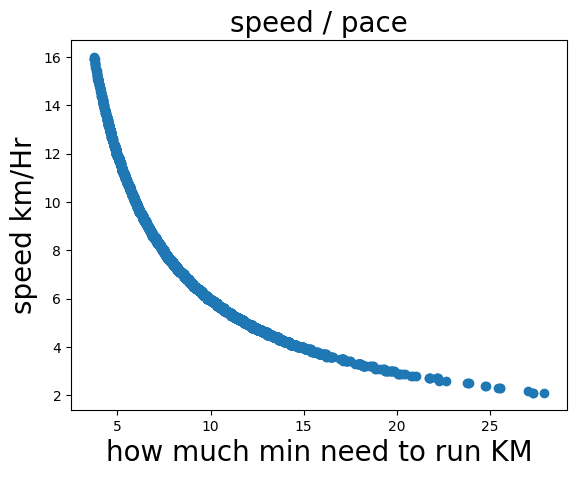

In [110]:
plt.scatter(marathon_df['Pace_min_Km'],marathon_df['Speed_Km/Hr']) 
plt.title('speed / pace',fontsize = 20)
plt.xlabel('how much min need to run KM',fontsize = 20)
plt.ylabel('speed km/Hr',fontsize = 20)

plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [111]:
# above is example of negative correlation

In [112]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_Total,Gender Rank_Total,speed_z_score,Chip Time duration-min,Gun Time duration-min
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,2.224072,42.96,42.99
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,2.187555,43.41,43.47


In [124]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = marathon_df.select_dtypes(include=np.number).corr()
corr_matrix

,Rank,Gender Rank,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Rank_Total,Gender Rank_Total,speed_z_score,Chip Time duration-min,Gun Time duration-min
Rank,1.000000,0.781259,-0.191364,-0.187260,-0.838273,0.816164,0.505408,0.229723,-0.838273,-0.187259,-0.191363
Gender Rank,0.781259,1.000000,-0.128011,-0.127336,-0.654046,0.608246,0.407270,0.541176,-0.654046,-0.127336,-0.128010
Gun Time,-0.191364,-0.128011,1.000000,0.995377,0.074119,-0.090736,-0.827828,-0.635880,0.074119,0.995377,1.000000
Chip Time,-0.187260,-0.127336,0.995377,1.000000,0.062546,-0.077728,-0.823093,-0.636982,0.062546,1.000000,0.995377
Speed_Km/Hr,-0.838273,-0.654046,0.074119,0.062546,1.000000,-0.910916,-0.298215,-0.035331,1.000000,0.062546,0.074118
Pace_min_Km,0.816164,0.608246,-0.090736,-0.077728,-0.910916,1.000000,0.255703,0.009386,-0.910916,-0.077728,-0.090735
Rank_Total,0.505408,0.407270,-0.827828,-0.823093,-0.298215,0.255703,1.000000,0.755724,-0.298215,-0.823093,-0.827828
Gender Rank_Total,0.229723,0.541176,-0.635880,-0.636982,-0.035331,0.009386,0.755724,1.000000,-0.035331,-0.636981,-0.635881
speed_z_score,-0.838273,-0.654046,0.074119,0.062546,1.000000,-0.910916,-0.298215,-0.035331,1.000000,0.062546,0.074118
Chip Time duration-min,-0.187259,-0.127336,0.995377,1.000000,0.062546,-0.077728,-0.823093,-0.636981,0.062546,1.000000,0.995377


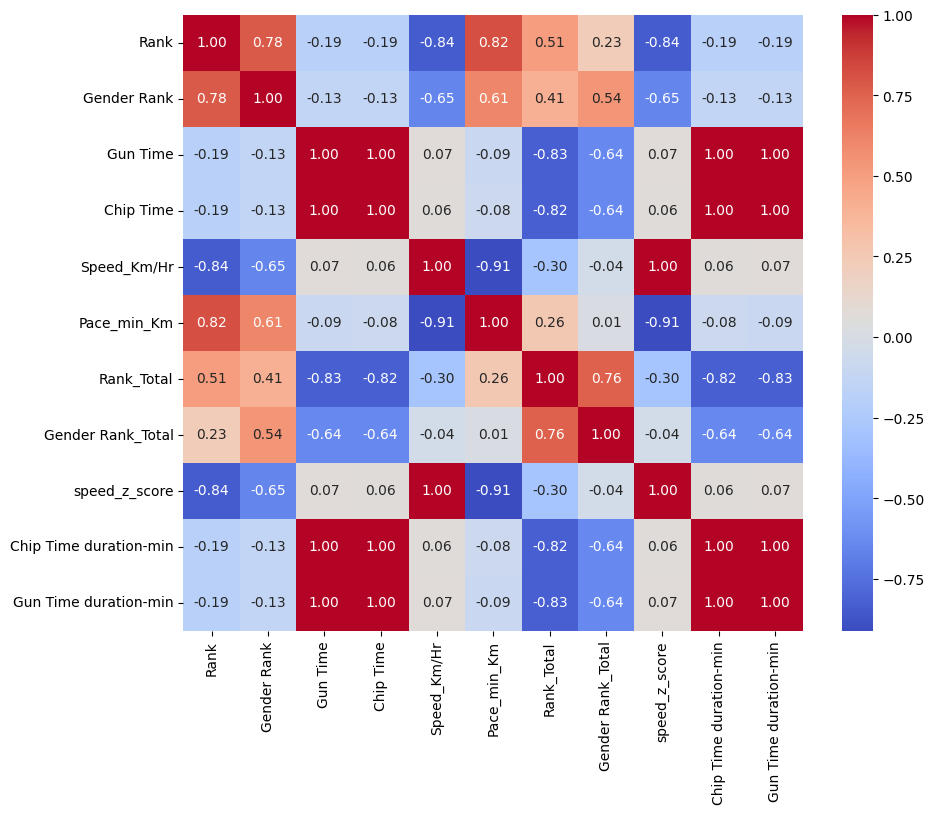

In [125]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [126]:
marathon_df.columns

Index(['Rank', 'Gender Rank', 'Gender', 'Category', 'Nationality', 'Gun Time',
       'Chip Time', 'Speed_Km/Hr', 'Pace_min_Km', 'Distance', 'Rank_Total',
       'Gender Rank_Total', 'speed_z_score', 'Chip Time duration-min',
       'Gun Time duration-min'],
      dtype='object')

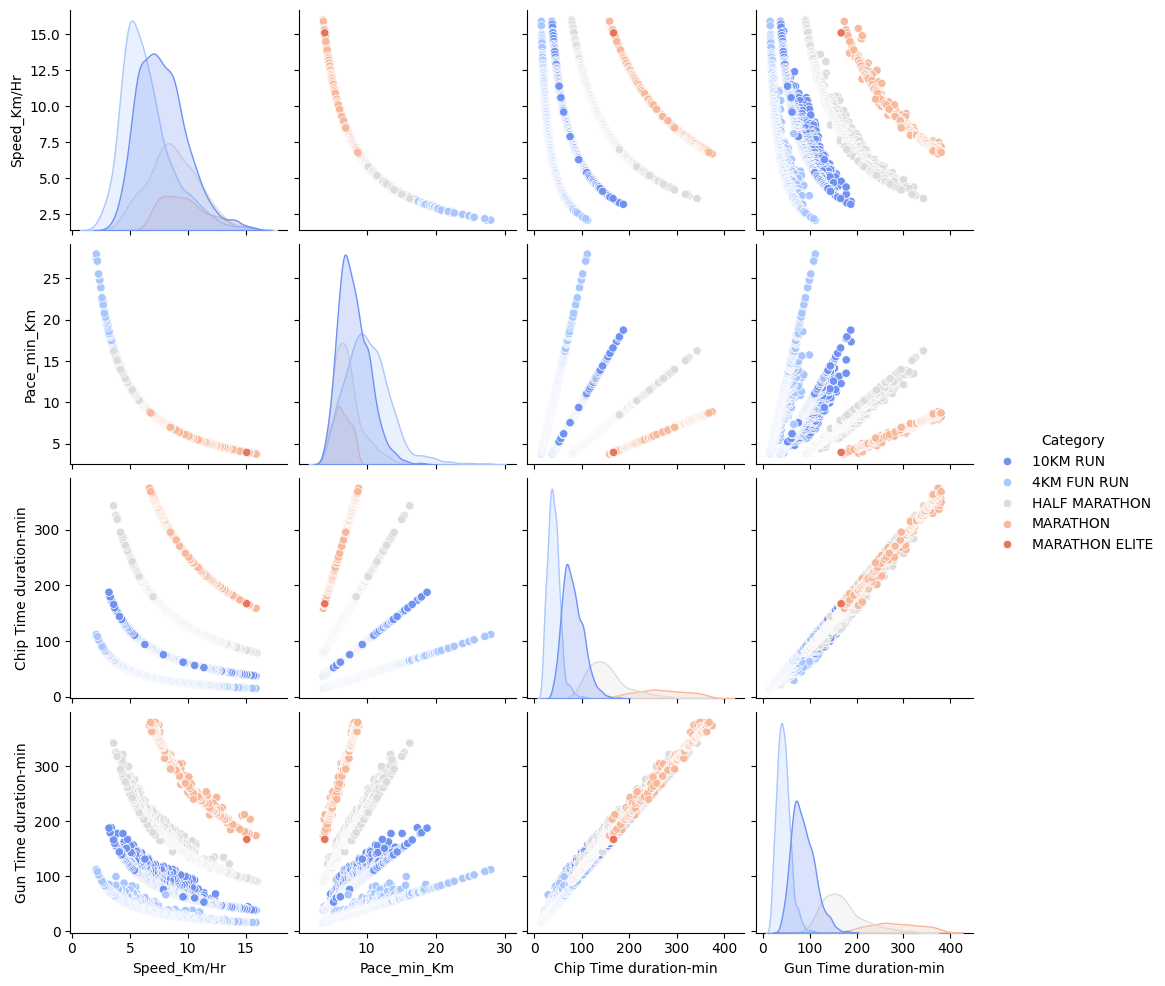

In [127]:
sns.pairplot(marathon_df[['Category', 'Speed_Km/Hr',
                          'Pace_min_Km','Chip Time duration-min', 
                          'Gun Time duration-min']], hue="Category", palette='coolwarm'); #for numerical values, we use hue for catagorical